In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
file_path = "nike_products.csv"
df = pd.read_csv(file_path)
# df.head(5)
len(df)

198

In [7]:
# create image directory
if not os.path.exists("images"):
    os.makedirs("images")

In [11]:
df = df.dropna()  # dropna
# make sure float
df["Current Price"] = df["Current Price"].astype(float)
df["Full Price"] = df["Full Price"].astype(float)

In [4]:
# new column discount
# unit of discount: %
df["Discount"] = (df["Full Price"] - df["Current Price"]) / df["Full Price"] * 100
df["Discount"] = df["Discount"].fillna(0)
df.head()

,Name,Brand,Current Price,Full Price,Category,Color,Size,SKU,GTIN,Discount
0,AIR ZOOM PEGASUS 41 CM,Nike,180.0,180,FOOTWEAR,HQ1718-400,6,be64e260-b8f4-5937-bc3e-a5e813e91ce4,197859141425,0.0
1,AIR ZOOM PEGASUS 41 CM,Nike,180.0,180,FOOTWEAR,HQ1718-400,6.5,c014e4dd-13f9-534c-88e7-f620c3e79b1f,197859140657,0.0
2,AIR ZOOM PEGASUS 41 CM,Nike,180.0,180,FOOTWEAR,HQ1718-400,7,cbec1199-9748-59ea-aa0d-cc78f9651715,197859154340,0.0
3,AIR ZOOM PEGASUS 41 CM,Nike,180.0,180,FOOTWEAR,HQ1718-400,7.5,eca738a1-f9f3-5d77-b429-5efb22e3e6cf,197859152667,0.0
4,AIR ZOOM PEGASUS 41 CM,Nike,180.0,180,FOOTWEAR,HQ1718-400,8,83c6255f-8009-5ef9-a89f-432471283f40,197859123018,0.0


In [27]:
top_products = df["Name"].value_counts().head(10)
print("Most popular running shoes: \n" + "AIR ZOOM PEGASUS 41 CM, NIKE REACTX INFINITY RUN 4, AIR ZOOM ALPHAFLY NEXT% 3 PRM" )

Most popular running shoes: 
AIR ZOOM PEGASUS 41 CM, NIKE REACTX INFINITY RUN 4, AIR ZOOM ALPHAFLY NEXT% 3 PRM


In [20]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top_products.values, y=top_products.index, hue=top_products.index, dodge=False, palette="viridis", legend=False)
plt.xlabel("Count")
plt.ylabel("Product Name")
plt.title("Top 10 Most Frequent Nike Products")
plt.savefig("images/top_products.png")
plt.close()
print("top_products plot successfully saved!")

In [29]:
# average discount of different shoes
avg_discount = df.groupby("Name")["Discount"].mean().sort_values(ascending=False).head(10)
avg_discount

Name
NIKE REACTX INFINITY RUN 4        35.018750
AIR ZOOM STRUCTURE 25 WIDE        30.037500
M NIKE PROMINA                    29.191667
AIR ZOOM ALPHAFLY NEXT% 3 PRM      0.000000
AIR ZOOM PEGASUS 41 CM             0.000000
AIR ZOOM VICTORY 2 ALL             0.000000
Mlb NK Dark Gray Club Unstr Ad     0.000000
NIKE FREE RN 2018                  0.000000
NIKE QUEST 6                       0.000000
NIKE REACTX INFINITY RUN 4 W       0.000000
Name: Discount, dtype: float64

In [30]:
# plot avg discount
plt.figure(figsize=(12, 6))
sns.barplot(x=avg_discount.values, y=avg_discount.index, hue=top_products.index, dodge=False, palette="viridis", legend=False)
plt.xlabel("Average Discount (%)")
plt.ylabel("Product Name")
plt.title("Top 10 Products with Highest Average Discount")
plt.savefig("images/top_discounts.png")
plt.close()
print("avg_discount plot successfully saved!")

In [31]:
# plot price_distribution
plt.figure(figsize=(10, 5))
sns.histplot(df["Current Price"], bins=20, kde=True, color="blue")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title("Distribution of Product Prices")
plt.savefig("images/price_distribution.png")
plt.close()
print("price_distribution plot successfully saved!")

price_distribution plot successfully saved!


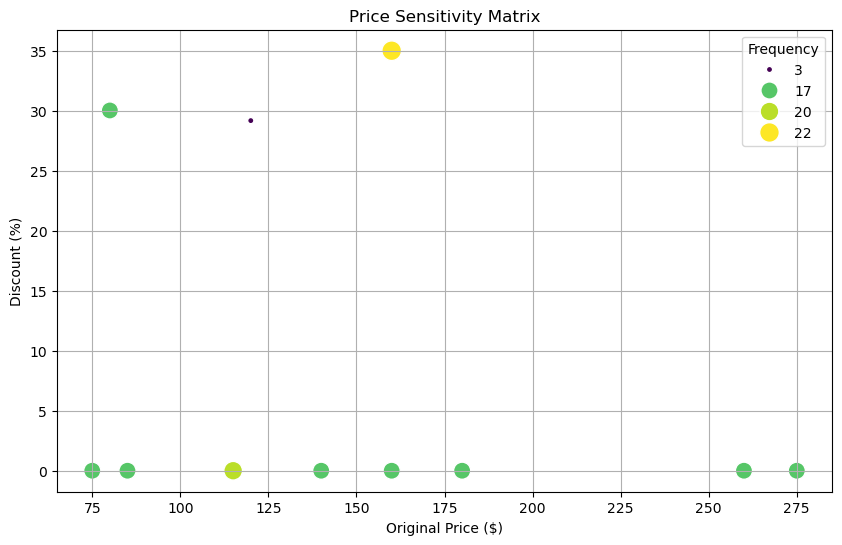

price_distribution plot successfully saved!


In [11]:
# add a column, Frequency
df['Frequency'] = df.groupby('Name')['Name'].transform('count')

# Price Sensitivity Matrix
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Full Price', y='Discount', 
                size='Frequency', hue='Frequency', 
                sizes=(20, 200), palette='viridis')
plt.title('Price Sensitivity Matrix')
plt.xlabel('Original Price ($)')
plt.ylabel('Discount (%)')
plt.grid(True)
plt.savefig("images/price_sensitivity_matrix.png")
# first save then show, or else jupyter will clean then show
plt.show()
plt.close()
print("price_sensitivity plot successfully saved!")